___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:

# @hidden_cell
from io import StringIO
import requests
import json
import pandas as pd

# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_19099026f8df40b6aec4353c7e897e95(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_5c7ca48007cfb646b75667f037d9ca9a469d66ad','domain': {'id': '595d59e0d3fe4089afc692bd55396f11'},
            'password': 'C_8vk=7&^H1Oa~XJ'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df = pd.read_csv(get_object_storage_file_with_credentials_19099026f8df40b6aec4353c7e897e95('PythonMachineLearning', 'kyphosis.csv'))
#df.head()


In [8]:
#df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## EDA

We'll just check out a simple pairplot for this small dataset.

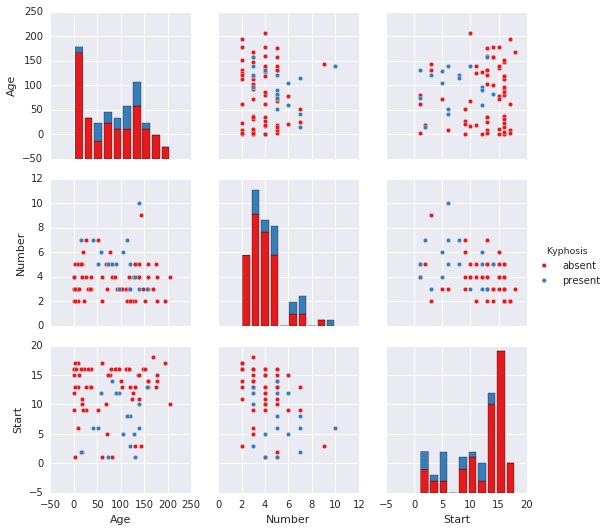

In [5]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [12]:
from sklearn.cross_validation import train_test_split

In [13]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [18]:
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.90      0.90      0.90        21
    present       0.50      0.50      0.50         4

avg / total       0.84      0.84      0.84        25



In [21]:
print(confusion_matrix(y_test,predictions))

[[19  2]
 [ 2  2]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [22]:
!pip install pydot

In [23]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

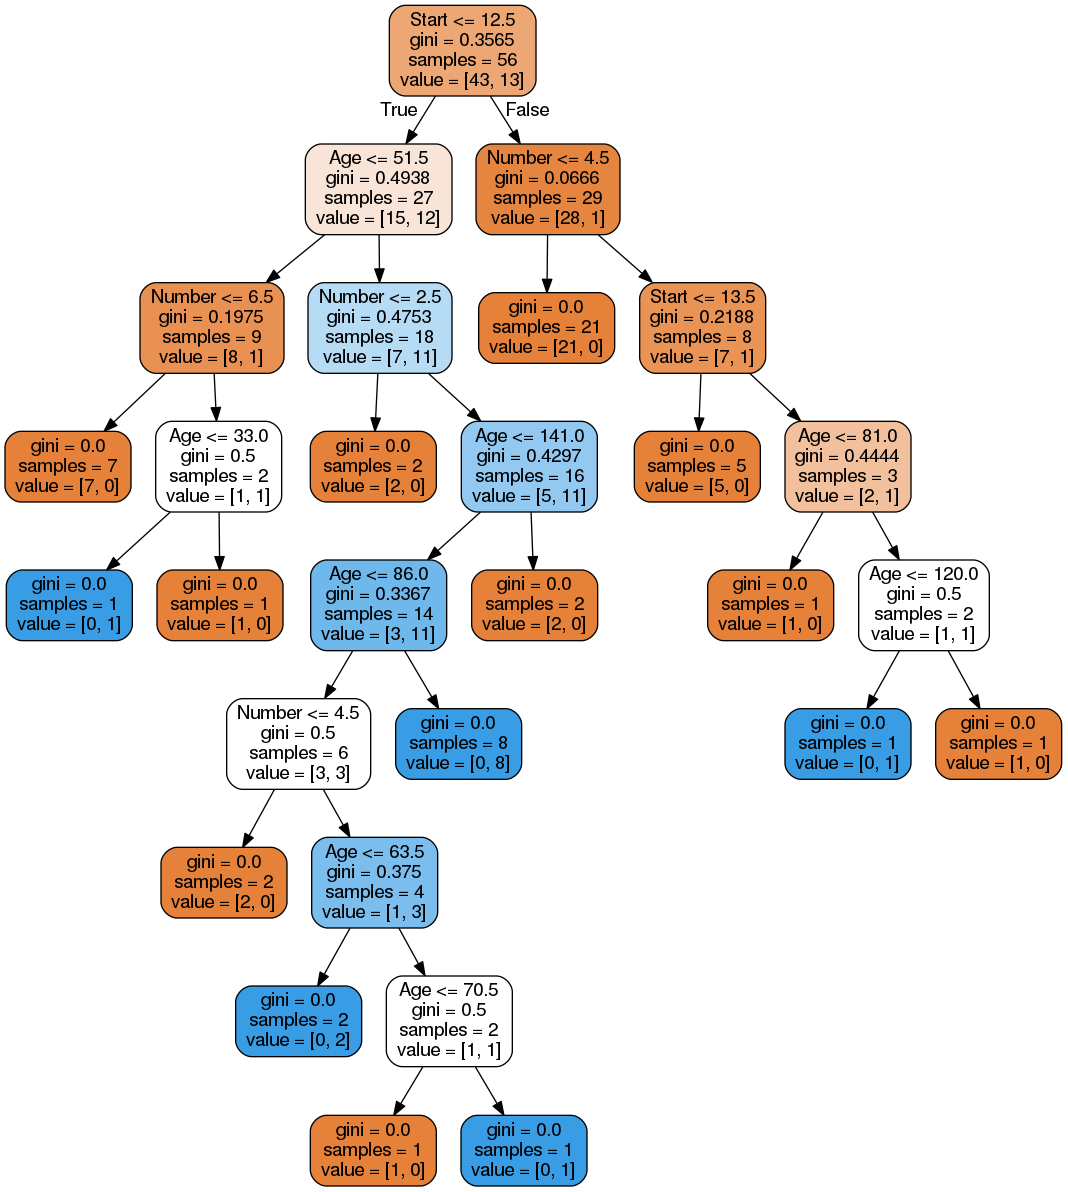

In [24]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,rfc_pred))

[[18  2]
 [ 4  1]]


In [23]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.82      0.90      0.86        20
    present       0.33      0.20      0.25         5

avg / total       0.72      0.76      0.74        25



# Great Job!